<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/%5BPractice_Project%5D_02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification Practice Project

To practice multiclass classification we are going to build neural network to classify different types of clothing.  
  
### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# The fashion mnist is already divided into test and training data.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [12]:
class_to_label = { 0 : 'T-shirt/top',
                   1 : 'Trouser',
                   2 : 'Pullover',
                   3 : 'Dress',
                   4 : 'Coat',
                   5 : 'Sandal',
                   6 : 'Shirt',
                   7 : 'Sneaker',
                   8 : 'Bag',
                   9 : 'Ankle boot'
                  }
print("Class Labels Dictionary: ", class_to_label)
print("Total number of classes: ", len(class_to_label))

Class Labels Dictionary:  {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Total number of classes:  10


The 10th training example:
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123

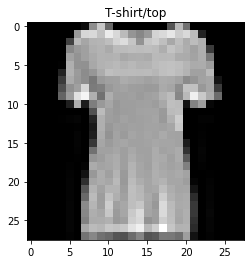

In [14]:
# Visualize a training sample
i = 10
print(f"The {i}th training example:")
print(X_train[i])
print(f"The {i} th training label is: {y_train[i]}: {class_to_label[y_train[i]]}")

plt.imshow(X_train[i], cmap = 'gray');
plt.title(class_to_label[y_train[i]]);

In [10]:
# Check the shapes of train and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
# Function to visualize multiple random images from the dataset

def visualize_data(images, labels, to_plot = 12, class_to_label = class_to_label):
  """
  Visualize data by plotting a given number of random images.
  """
  ax = plt.figure(figsize = (12, to_plot/4 *3))
  for i in range(to_plot):
    random_choice = np.random.choice(len(labels))
    ax = plt.subplot(to_plot/4, 4, i+1)
    ax = plt.imshow(images[random_choice], cmap = 'gray')
    ax = plt.title(class_to_label[labels[random_choice]], fontdict={'fontsize': 15, 'color': 'green'})
    ax = plt.axis(False)


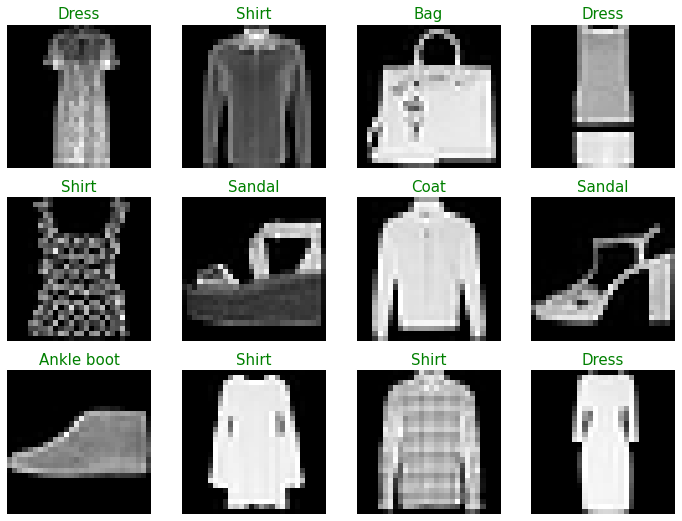

In [33]:
visualize_data(X_train, y_train)